<a href="https://colab.research.google.com/github/hackerinheels/mnistTraining/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What number is that?

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Build a neural network that classifies images.
2. Train this neural network.
3. And, finally, evaluate the accuracy of the model.

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

In [22]:
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline
import keras
import pandas
import numpy as np

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

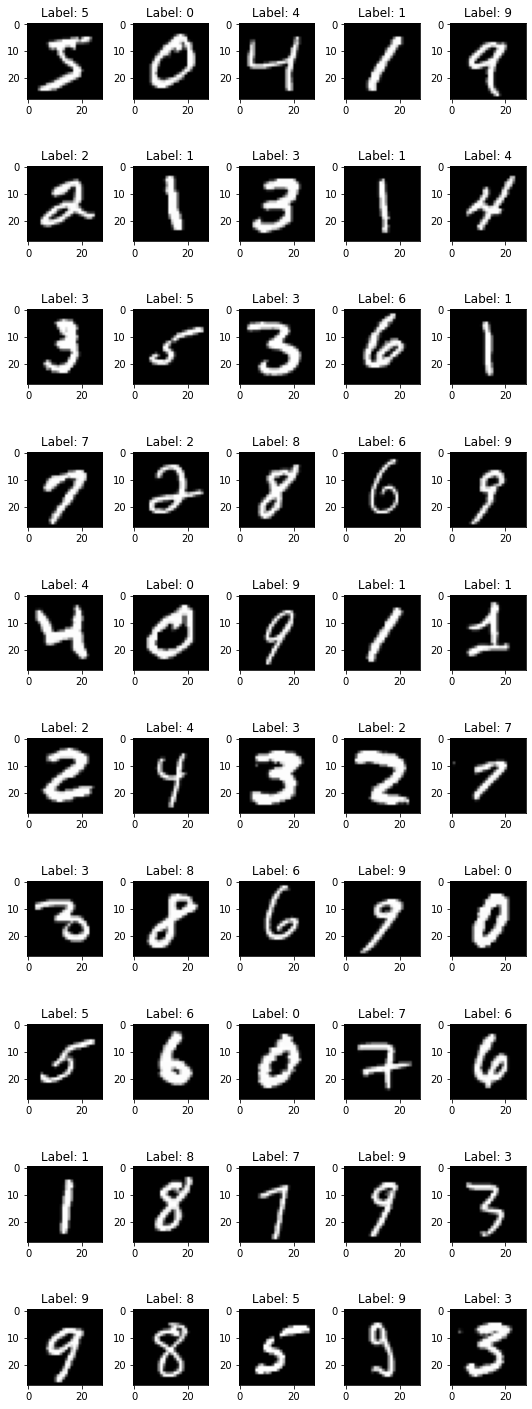

In [5]:
num_row = 10
num_col = 5# plot images
num = num_row*num_col
images = x_train[:num]
labels = y_train[:num]
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
      
      ax = axes[i//num_col, i%num_col]
      ax.imshow(images[i].reshape(28, 28), cmap='gray')
      ax.set_title('Label: {}'.format(labels[i]))


   
plt.tight_layout()
plt.show()

In [24]:

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
input_shape = (28, 28, 1)
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)
model.evaluate(x_test,  y_test, verbose=1)

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000
Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2070 - accuracy: 0.9372
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0832 - accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0581 - accuracy: 0.9814
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0428 - accuracy: 0.9859
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0372 - accuracy: 0.9872
Epoch 6/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0295 - accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0251 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0234 - accuracy: 0.9921
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/st

[0.06587783247232437, 0.984499990940094]

In [10]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               605824    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
import keras
import pandas
import numpy as np

In [11]:
pred = model.predict(x_test)
pred_class = pred.argmax(axis=1)


In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)


313/313 [==============================] - 2s 7ms/step - loss: 2.3010 - accuracy: 0.1135


In [12]:
labels = y_train[:10]
labels
for i in range(10):
    y_train[:i]

In [13]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

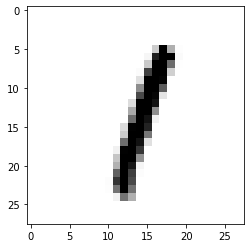

In [14]:
plt.imshow(x_test[5].reshape(28, 28),cmap='Greys')

In [15]:
index = 0
i = 0
bad_preds = []
bad_images = []
while index < 10:
    if (pred_class[i]!=y_test[i]):
        index = index + 1
        bad_images.append (x_test[i])
        bad_preds.append(pred_class[i])
    i = i + 1

ValueError: ignored

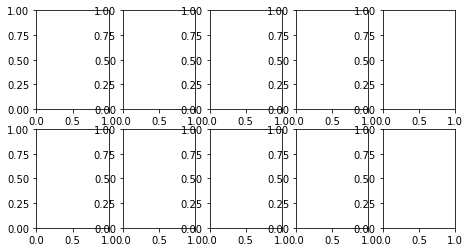

In [16]:
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(bad_preds[i].reshape(28, 28), cmap='gray')
    ax.set_title('Label: {}'.format(pred_class[i]))
plt.tight_layout()
plt.show()